[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning data...
Training models... please wait.

       MODEL PERFORMANCE SUMMARY
                   Algorithm  Accuracy (%)
                 Naive Bayes         98.48
Support Vector Machine (SVM)         98.83
---------------------------------------------
SVM Stability (Cross-Val Accuracy): 98.24%

Generating Visualizations...


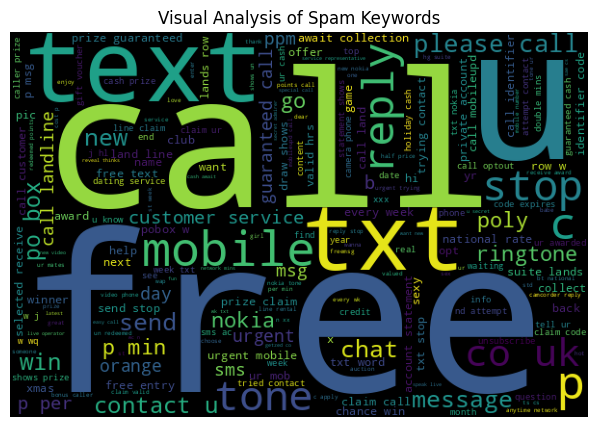

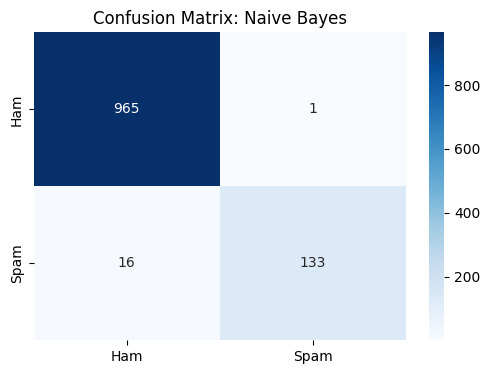


[INFO] Deployment Files Saved Successfully!

-----------------------------------
      LIVE MESSAGE TESTING
-----------------------------------
Message : Congratulations! You have won a $1000 cash prize. Click here to claim.
Result  : 🚨 SPAM
-----------------------------------
Message : Hey, are we still meeting for lunch today?
Result  : ✅ HAM (Safe)
-----------------------------------

[ INTERACTIVE MODE ]
Enter a message to check (or press Enter to skip): URGENT! Your mobile number has been awarded a $2000 prize. To claim call 090589089 now
Message : URGENT! Your mobile number has been awarded a $2000 prize. To claim call 090589089 now
Result  : 🚨 SPAM
-----------------------------------


In [ ]:
import pandas as pd
import urllib.request
import zipfile
import re
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Download & Load Dataset
print("Downloading dataset...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
urllib.request.urlretrieve(url, 'smsspamcollection.zip')
with zipfile.ZipFile('smsspamcollection.zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'text'])

# 2. Data Cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

print("Cleaning data...")
df['cleaned_text'] = df['text'].apply(clean_text)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# 3. Feature Extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training
print("Training models... please wait.")
nb_model = MultinomialNB().fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

svm_model = SVC(kernel='linear').fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# --- SECTION 4: Professional Performance Output ---
print("\n" + "="*45)
print("       MODEL PERFORMANCE SUMMARY")
print("="*45)

results = pd.DataFrame({
    'Algorithm': ['Naive Bayes', 'Support Vector Machine (SVM)'],
    'Accuracy (%)': [round(accuracy_score(y_test, nb_preds)*100, 2),
                     round(accuracy_score(y_test, svm_preds)*100, 2)]
})
print(results.to_string(index=False))

print("-" * 45)
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print(f"SVM Stability (Cross-Val Accuracy): {round(cv_scores.mean()*100, 2)}%")
print("="*45)

# 5. Visualizations
print("\nGenerating Visualizations...")
spam_words = ' '.join(list(df[df['label'] == 1]['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=600, height=400, background_color='black').generate(spam_words))
plt.title("Visual Analysis of Spam Keywords")
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: Naive Bayes')
plt.show()

# 6. Saving Model
joblib.dump(svm_model, 'spam_model_svm.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("\n[INFO] Deployment Files Saved Successfully!")

# --- SECTION 7: Stylish Live Testing ---
print("\n" + "-"*35)
print("      LIVE MESSAGE TESTING")
print("-" * 35)

def predict_email_stylish(msg):
    cleaned = clean_text(msg)
    vec = tfidf.transform([cleaned]).toarray()
    prediction = svm_model.predict(vec)
    status = "🚨 SPAM" if prediction[0] == 1 else "✅ HAM (Safe)"

    print(f"Message : {msg}")
    print(f"Result  : {status}")
    print("-" * 35)

# Actual Tests
predict_email_stylish("Congratulations! You have won a $1000 cash prize. Click here to claim.")
predict_email_stylish("Hey, are we still meeting for lunch today?")

# ---SECTION 8: Interactive User Interface ---
print("\n[ INTERACTIVE MODE ]")
user_msg = input("Enter a message to check (or press Enter to skip): ")

if user_msg:
  predict_email_stylish(user_msg)
else:
  print("Interactive testing skipped.")